# Welcome to the SDV!

The Synthetic Data Vault (SDV) is a Python library designed to be your one-stop shop for creating tabular synthetic data.

In this notebook, we'll demo the basic features of SDV to get you started with creating synthetic data.

# 0. Installation

Install the SDV library.

In [1]:
%pip install sdv
%pip install urllib3==1.26.7

^C
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



     -------------------------------------- 138.8/138.8 kB 2.1 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.12
    Uninstalling urllib3-1.26.12:
      Successfully uninstalled urllib3-1.26.12


Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 126.4/126.4 kB 1.9 MB/s eta 0:00:00
     ---------------------------------------- 1.6/1.6 MB 7.0 MB/s eta 0:00:00
     ---------------------------------------- 47.0/47.0 kB 2.5 MB/s eta 0:00:00
     ---------------------------------------- 78.3/78.3 kB 2.2 MB/s eta 0:00:00
     -------------------------------------- 54.4/54.4 kB 100.9 kB/s eta 0:00:00
     ---------------------------------------- 70.5/70.5 kB 1.3 MB/s eta 0:00:00
     -------------------------------------- 160.3/160.3 kB 3.2 MB/s eta 0:00:00
     ---------------------------------------- 10.6/10.6 MB 1.6 MB/s eta 0:00:00
     ---------------------------------------- 9.2/9.2 MB 1.0 MB/s eta 0:00:00
     ------------------------------------ 172.3/172.3 MB 713.5 kB/s eta 0:00:00
  Using cached pytz-2023.3.post1-py2.py3-none-any.whl (502 kB)
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
  Us

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\sbgup\AppData\Roaming\Python\Python311\site-packages\pip\_internal\cli\base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "C:\Users\sbgup\AppData\Roaming\Python\Python311\site-packages\pip\_internal\cli\req_command.py", line 248, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\sbgup\AppData\Roaming\Python\Python311\site-packages\pip\_internal\commands\install.py", line 377, in run
    requirement_set = resolver.resolve(
                      ^^^^^^^^^^^^^^^^^
  File "C:\Users\sbgup\AppData\Roaming\Python\Python311\site-packages\pip\_internal\resolution\resolvelib\resolver.py", line 92, in resolve
    result = self._result = resolver.resolve(
                            ^^^^^^^^^^^^^^^^^
  File "C:\Users\sbgup\AppData\Roaming\Python\Python311\site-packages\pip\_vendor\resolvelib\resolvers.py", line 54

**Important**: If you're using Google Colab, please restart the runtime by clicking `Runtime` in the top menu bar and then `Restart Runtime`

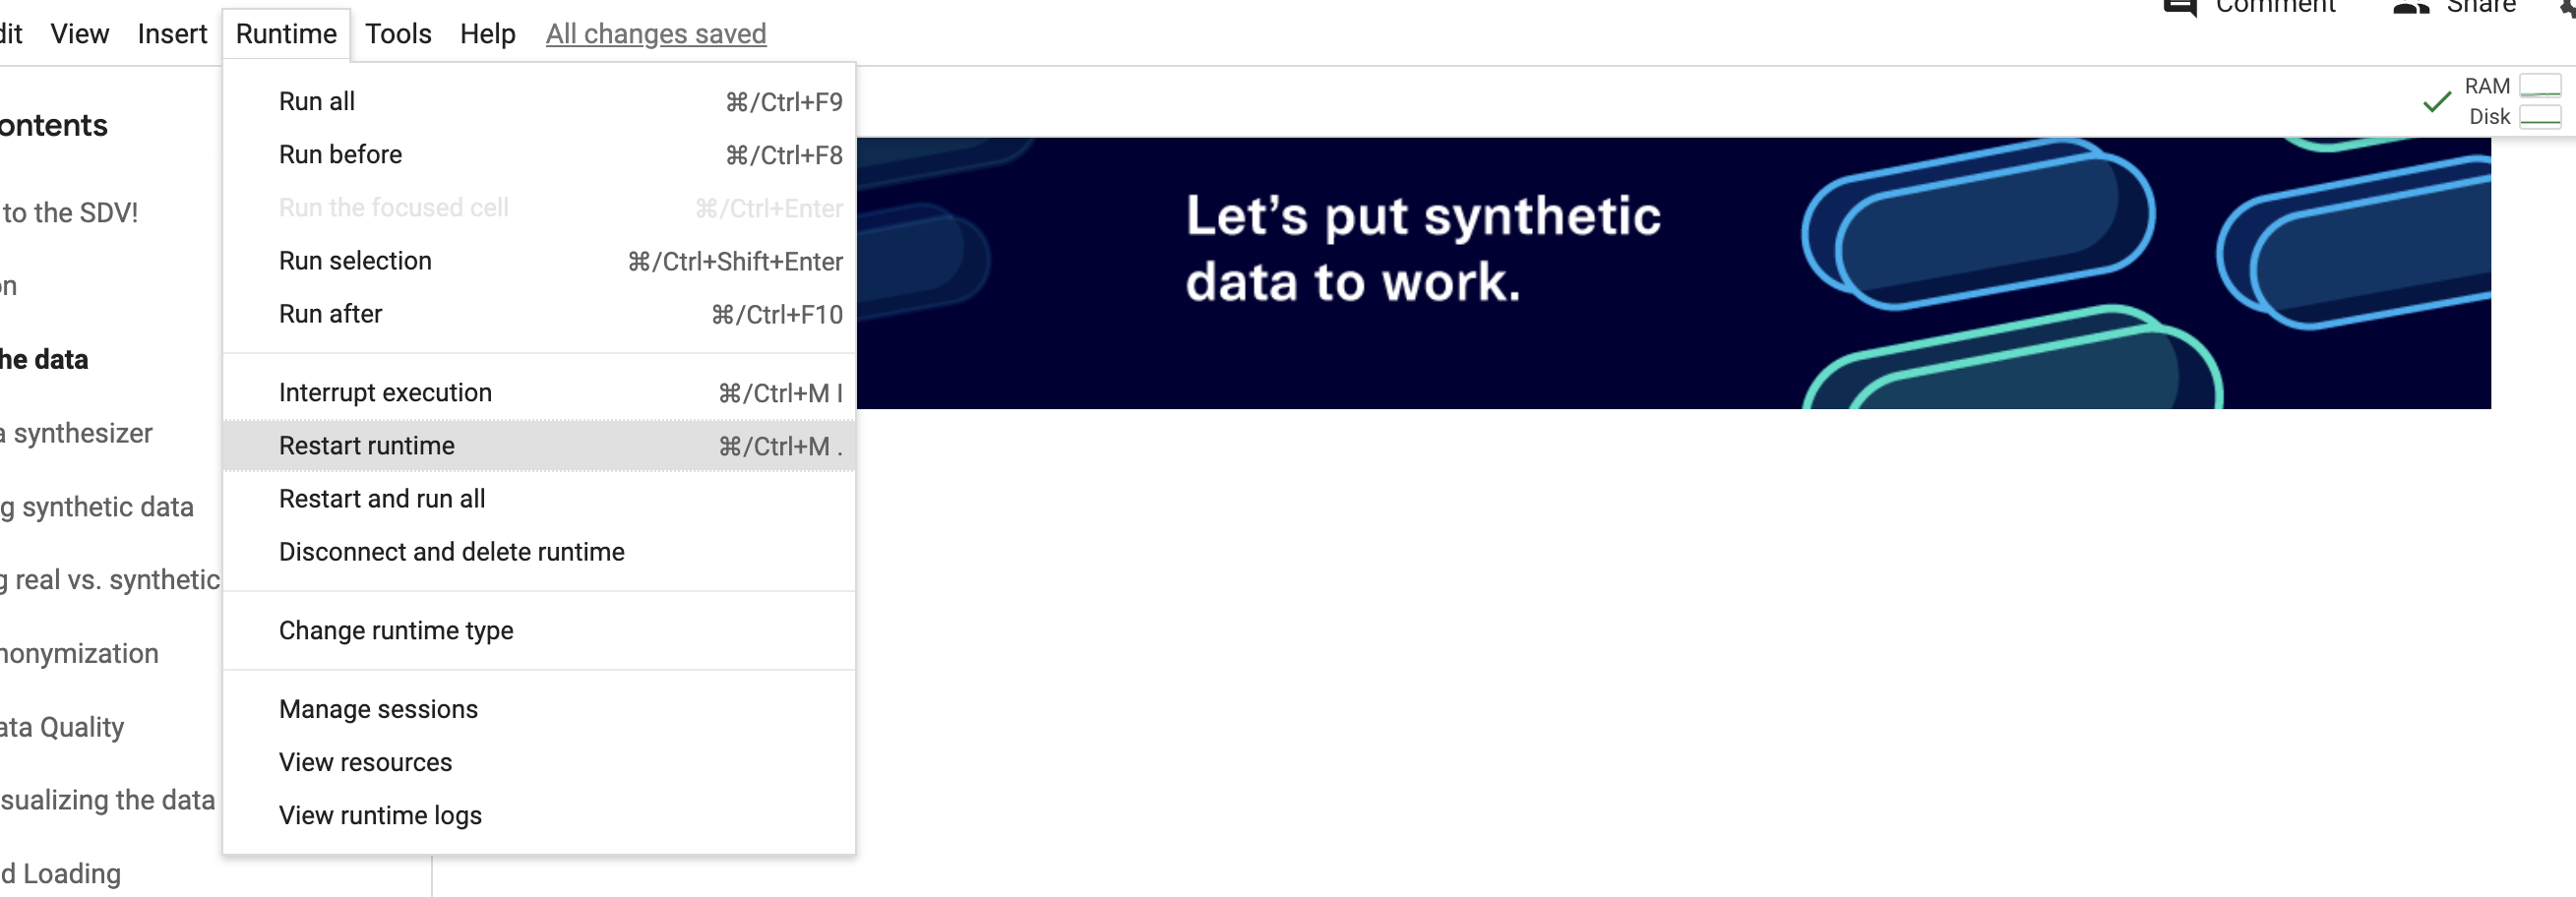

# 1. Loading the data
For this demo, we'll use a fake dataset that describes some fictional guests staying at a hotel.

In [ ]:
from sdv.datasets.demo import download_demo

real_data, metadata = download_demo(
    modality='single_table',
    dataset_name='fake_hotel_guests'
)

**Details**: The data is available as a single table.
- `guest_email` is a _primary key_ that uniquely identifies every row
- Other columns have a variety of data types and some the data may be missing.

In [ ]:
real_data.head()

,guest_email,has_rewards,room_type,amenities_fee,checkin_date,checkout_date,room_rate,billing_address,credit_card_number
0,michaelsanders@shaw.net,False,BASIC,37.89,27 Dec 2020,29 Dec 2020,131.23,"49380 Rivers Street\nSpencerville, AK 68265",4075084747483975747
1,randy49@brown.biz,False,BASIC,24.37,30 Dec 2020,02 Jan 2021,114.43,"88394 Boyle Meadows\nConleyberg, TN 22063",180072822063468
2,webermelissa@neal.com,True,DELUXE,0.00,17 Sep 2020,18 Sep 2020,368.33,"0323 Lisa Station Apt. 208\nPort Thomas, LA 82585",38983476971380
3,gsims@terry.com,False,BASIC,NaN,28 Dec 2020,31 Dec 2020,115.61,"77 Massachusetts Ave\nCambridge, MA 02139",4969551998845740
4,misty33@smith.biz,False,BASIC,16.45,05 Apr 2020,NaN,122.41,"1234 Corporate Drive\nBoston, MA 02116",3558512986488983


The demo also includes **metadata**, a description of the dataset. It includes the primary keys as well as the data types for each column (called "sdtypes").

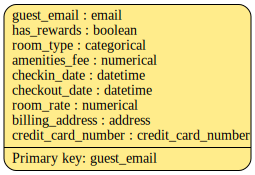

In [ ]:
metadata.visualize()

# 2. Creating a synthesizer

An SDV **synthesizer** is an object that you can use to create synthetic data. It learns patterns from the real data and replicates them to generate synthetic data.

Let's use the `FAST_ML` preset synthesizer, which is optimized for performance.

In [ ]:
from sdv.lite import SingleTablePreset

synthesizer = SingleTablePreset(
    metadata,
    name='FAST_ML'
)

Next, we can **train** the synthesizer. We pass in the real data so it can learn patterns using machine learning.

In [ ]:
synthesizer.fit(
    data=real_data
)

NameError: ignored

Now the synthesizer is ready to use!

# 3. Generating synthetic data
Use the `sample` function and pass in any number of rows to synthesize.

In [ ]:
synthetic_data = synthesizer.sample(
    num_rows=500
)

synthetic_data.head()

,guest_email,has_rewards,room_type,amenities_fee,checkin_date,checkout_date,room_rate,billing_address,credit_card_number
0,dsullivan@example.net,False,BASIC,9.752814,31 Mar 2020,19 Apr 2020,151.871782,"90469 Karla Knolls Apt. 781\nSusanberg, NC 28401",5161033759518983
1,steven59@example.org,False,BASIC,NaN,25 Jun 2020,14 Aug 2020,181.481346,"1080 Ashley Creek Apt. 622\nWest Amy, NM 25058",4133047413145475690
2,brandon15@example.net,False,BASIC,22.554106,14 Apr 2020,07 Apr 2020,143.655477,"99923 Anderson Trace Suite 861\nNorth Haley, T...",4977328103788
3,humphreyjennifer@example.net,False,BASIC,24.324111,25 May 2020,11 Jun 2020,178.353772,"9301 John Parkways\nThomasland, OH 61350",3524946844839485
4,joshuabrown@example.net,False,BASIC,20.523800,13 Nov 2019,25 Oct 2019,183.572274,"126 George Tunnel\nDuranstad, MS 95176",4446905799576890978


The synthesizer is generating synthetic guests in the **same format as the original data**.

# 4. Evaluating real vs. synthetic data
The synthetic data replicates the **mathematical properties** of the real data.

## 4.1 Anonymization

In the original dataset, we had some sensitive columns such as the guest's email, billing address and phone number. In the synthetic data, these columns are **fully anonymized** -- they contain entirely fake values that follow the format of the original.

In [ ]:
sensitive_column_names = ['guest_email', 'billing_address', 'credit_card_number']

real_data[sensitive_column_names].head(3)

In [ ]:
synthetic_data[sensitive_column_names].head(3)

## 4.2 Data Quality

Other columns in our data are not sensitive. The synthetic data replicates the **mathematical properties** of these columns. To get more insight, we can use the `evaluation` module.

In [ ]:
from sdv.evaluation.single_table import evaluate_quality

quality_report = evaluate_quality(
    real_data,
    synthetic_data,
    metadata
)

The report allows us to visualize the different properties that were captured. For example, the visualization below shows us _which_ individual column shapes were well-captured and which weren't.

In [ ]:
quality_report.get_visualization('Column Shapes')

## 4.3 Visualizing the data

For even more insight, we can visualize the real vs. synthetic data.

Let's perform a 1D visualization comparing a column of the real data to the synthetic data.

In [ ]:
from sdv.evaluation.single_table import get_column_plot

fig = get_column_plot(
    real_data=real_data,
    synthetic_data=synthetic_data,
    column_name='amenities_fee',
    metadata=metadata
)

fig.show()

We can also visualize in 2D, comparing the correlations of a pair of columns.

In [ ]:
from sdv.evaluation.single_table import get_column_pair_plot

fig = get_column_pair_plot(
    real_data=real_data,
    synthetic_data=synthetic_data,
    column_names=['checkin_date', 'checkout_date'],
    metadata=metadata
)

fig.show()

# 5. Saving and Loading
We can save the synthesizer to share with others and sample more synthetic data in the future.


In [ ]:
synthesizer.save('my_synthesizer.pkl')

synthesizer = SingleTablePreset.load('my_synthesizer.pkl')

# 6. What's Next?

For more information about the Fast ML preset synthesizer, visit [the documentation](https://docs.sdv.dev/sdv/single-table-data/modeling/synthesizers/fast-ml-preset).

Explore more SDV features through our [other tutorials](https://docs.sdv.dev/sdv/demos).




---

# About

The [Synthetic Data Vault Project](https://github.com/sdv-dev/SDV) was first created at MIT's Data to AI Lab in 2016. After 4 years of research and traction with enterprise, we created [DataCebo](https://datacebo.com/) in 2020 with the goal of growing the project. Today, DataCebo is the proud developer of SDV, the largest ecosystem for tabular synthetic data generation & evaluation.

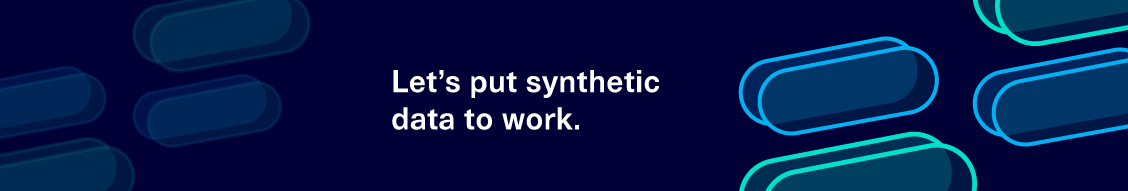